In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import seaborn as sns
print(tf.__version__)
batch_size = 32
img_height = 180
img_width = 180
data_root="\\Users\\George\\Documents\\Python\\ADS CapStone\\aff_wild_annotations_bboxes_landmarks_new\\faces\\"
data_root2="\\Users\\George\\Documents\\Python\\ADS CapStone\\aff_wild_annotations_bboxes_landmarks_new\\landmarkimgbalanced\\"

2.4.1


In [31]:

# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_root+'arousal',
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_root+'arousal',
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_root2,
    seed=123,
    image_size=(img_height, img_width),
    batch_size = 200
)

Found 5958 files belonging to 3 classes.


['high', 'low', 'neutral']


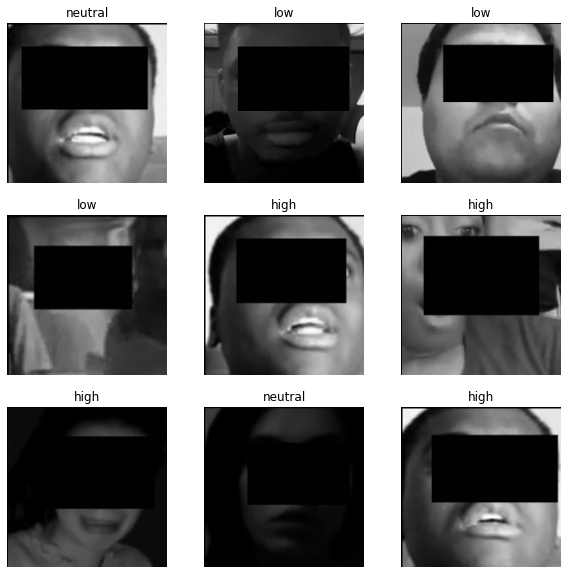

In [32]:
class_names = test_ds.class_names
print(class_names)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [33]:
##Import Model
from tensorflow import keras
model = keras.models.load_model('\\Users\\George\\Documents\\Python\\ADS CapStone\\Model(Epoch_Omit_20)')


In [34]:

#result = model.evaluate(test_ds)
#dict(zip(model.metrics_names, result))

test_images = []
test_labels = []
predictions = []

for image, label in test_ds.take(1):
  test_images.append(image.numpy())
  test_labels.append(label.numpy())
  predictions.append(np.argmax(model.predict(test_images), axis=1))

test_labels = np.array(test_labels)
predictions = np.array(predictions)

y_true = test_labels

test_acc = sum(predictions[0] == y_true[0]) / len(y_true[0])
print(f'Test set accuracy: {test_acc:.0%}')

Test set accuracy: 47%


['high', 'low', 'neutral']


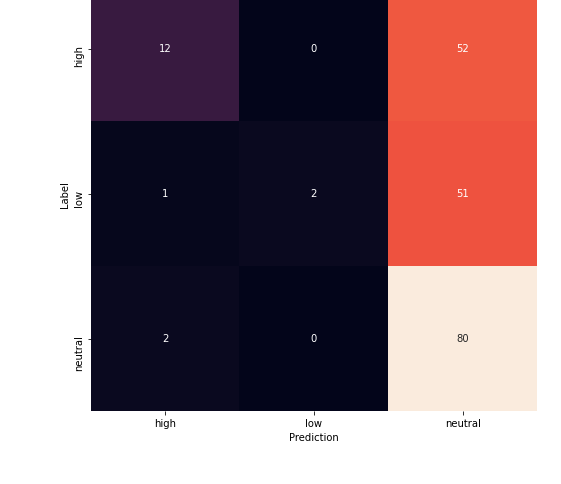

In [35]:


print(class_names)
confusion_mtx = tf.math.confusion_matrix(y_true[0], predictions[0]) 
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, yticklabels = class_names, xticklabels = class_names,annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()